In [3]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [5]:
y = train['Survived']

In [6]:
# 트레이닝, 테스트 데이터 성별 이진화, female=1, male=0
embarked_mapping = {'female' :1, 'male' :0}
train['Sex'] = train['Sex'].map(embarked_mapping)
test['Sex'] = test['Sex'].map(embarked_mapping)

In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


## 일단 Sex 만 사용하자!!

In [8]:
temp_train = train[['Sex']]
temp_test = test[['Sex']]

#### w0, w1 난수 생성

In [9]:
import random
w0 = random.random()
w1 = (-1) * random.random()

In [10]:
print(w0, w1)

0.611541839793265 -0.07950248919383662


In [11]:
predicted = pd.DataFrame(columns = ['Survived'])

In [12]:
predicted

,Survived


In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
# predict each row
def pred_probability(x1):
    z = w0 + (w1 * x1)
    return sigmoid(z)

In [15]:
def cost_function():
    sum = 0
    m = 0
    for index, row in train.iterrows():
        m = m+1
        probability = pred_probability(row['Sex'])
        sum += y[index] * np.log(probability) + (1 - y[index]) * np.log(1 - probability)
    total_cost = -(1/m) * sum
    return total_cost

In [16]:
train.loc[1]['Sex']

1

In [17]:
def gradient_derivate(w, i):
    sum = 0
    m = 0
    for index, row in train.iterrows():
        m=m+1
        probability = pred_probability(row['Sex'])
        if (i == 0):
            sum += (probability - y[index])
        else:
            sum += (probability - y[index]) * train.loc[index]['Sex']
    return (1/m) * sum

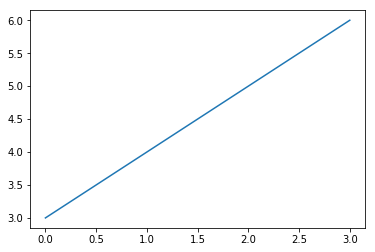

In [32]:
import matplotlib.pyplot as plt
temptemptemp = [3,4,5,6]
plt.plot(temptemptemp)
plt.show()

In [53]:
# 알파값 0.01
alpha = 0.0001
# 그래프좀,,,
w_zero_graph = [];
w_one_graph = [];
# w_arr 배열이랑 배열 원소 개수 받는 함수
def converge(w_arr, n):
    # 일단 10번 반복해보자,,,
    for j in range(100000):
        temp_arr = w_arr    # temp_arr에 비교하려고 복사,,,
        w0 = w_arr[0]
        w1 = w_arr[1]
        print(j, "번째학습,,,")
        for i in range(n):
            w_arr[i] = w_arr[i] - alpha * gradient_derivate(w_arr[i], i)
            print(i, "번째 w?:", w_arr[i], "||", "원래:", temp_arr[i])
            if (i == 0):
                w_zero_graph.append(w_arr[0])
            else:
                w_one_graph.append(w_arr[1])
        if (j % 10 == 0):
            print("the cost is:", cost_function())
        print("-----------------------")       
            
    plt.plot(w_zero_graph, label='w0')
    plt.plot(w_one_graph, label='w1')
    plt.legend()
    plt.show()

In [54]:
# 한번 실행해보자,,, ㄷㄷ
converge([w0, w1], 2)

0 번째학습,,,
0 번째 w?: 0.6115160404951375 || 원래: 0.6115160404951375
1 번째 w?: -0.079498539363373 || 원래: -0.079498539363373
the cost is: 0.8131044329976491
-----------------------
1 번째학습,,,
0 번째 w?: 0.61149024119701 || 원래: 0.61149024119701
1 번째 w?: -0.07949458953290939 || 원래: -0.07949458953290939
-----------------------
2 번째학습,,,
0 번째 w?: 0.6114644418988825 || 원래: 0.6114644418988825
1 번째 w?: -0.07949063970244577 || 원래: -0.07949063970244577
-----------------------
3 번째학습,,,
0 번째 w?: 0.611438642600755 || 원래: 0.611438642600755
1 번째 w?: -0.07948668987198215 || 원래: -0.07948668987198215
-----------------------
4 번째학습,,,
0 번째 w?: 0.6114128433026275 || 원래: 0.6114128433026275
1 번째 w?: -0.07948274004151853 || 원래: -0.07948274004151853
-----------------------
5 번째학습,,,
0 번째 w?: 0.6113870440045 || 원래: 0.6113870440045
1 번째 w?: -0.07947879021105492 || 원래: -0.07947879021105492
-----------------------
6 번째학습,,,
0 번째 w?: 0.6113612447063724 || 원래: 0.6113612447063724
1 번째 w?: -0.0794748403805913 || 원래: -0.07947

1 번째 w?: -0.07928129868787404 || 원래: -0.07928129868787404
-----------------------
56 번째학습,,,
0 번째 w?: 0.6100712797999966 || 원래: 0.6100712797999966
1 번째 w?: -0.07927734885741042 || 원래: -0.07927734885741042
-----------------------
57 번째학습,,,
0 번째 w?: 0.6100454805018691 || 원래: 0.6100454805018691
1 번째 w?: -0.0792733990269468 || 원래: -0.0792733990269468
-----------------------
58 번째학습,,,
0 번째 w?: 0.6100196812037416 || 원래: 0.6100196812037416
1 번째 w?: -0.07926944919648318 || 원래: -0.07926944919648318
-----------------------
59 번째학습,,,
0 번째 w?: 0.6099938819056141 || 원래: 0.6099938819056141
1 번째 w?: -0.07926549936601957 || 원래: -0.07926549936601957
-----------------------
60 번째학습,,,
0 번째 w?: 0.6099680826074866 || 원래: 0.6099680826074866
1 번째 w?: -0.07926154953555595 || 원래: -0.07926154953555595
the cost is: 0.8131044329976491
-----------------------
61 번째학습,,,
0 번째 w?: 0.6099422833093591 || 원래: 0.6099422833093591
1 번째 w?: -0.07925759970509233 || 원래: -0.07925759970509233
-----------------------
62 번째학

1 번째 w?: -0.07906405801237507 || 원래: -0.07906405801237507
the cost is: 0.8131044329976491
-----------------------
111 번째학습,,,
0 번째 w?: 0.6086523184029833 || 원래: 0.6086523184029833
1 번째 w?: -0.07906010818191145 || 원래: -0.07906010818191145
-----------------------
112 번째학습,,,
0 번째 w?: 0.6086265191048558 || 원래: 0.6086265191048558
1 번째 w?: -0.07905615835144783 || 원래: -0.07905615835144783
-----------------------
113 번째학습,,,
0 번째 w?: 0.6086007198067283 || 원래: 0.6086007198067283
1 번째 w?: -0.07905220852098421 || 원래: -0.07905220852098421
-----------------------
114 번째학습,,,
0 번째 w?: 0.6085749205086007 || 원래: 0.6085749205086007
1 번째 w?: -0.0790482586905206 || 원래: -0.0790482586905206
-----------------------
115 번째학습,,,
0 번째 w?: 0.6085491212104732 || 원래: 0.6085491212104732
1 번째 w?: -0.07904430886005698 || 원래: -0.07904430886005698
-----------------------
116 번째학습,,,
0 번째 w?: 0.6085233219123457 || 원래: 0.6085233219123457
1 번째 w?: -0.07904035902959336 || 원래: -0.07904035902959336
-----------------------


1 번째 w?: -0.0788468173368761 || 원래: -0.0788468173368761
-----------------------
166 번째학습,,,
0 번째 w?: 0.6072333570059699 || 원래: 0.6072333570059699
1 번째 w?: -0.07884286750641248 || 원래: -0.07884286750641248
-----------------------
167 번째학습,,,
0 번째 w?: 0.6072075577078424 || 원래: 0.6072075577078424
1 번째 w?: -0.07883891767594886 || 원래: -0.07883891767594886
-----------------------
168 번째학습,,,
0 번째 w?: 0.6071817584097149 || 원래: 0.6071817584097149
1 번째 w?: -0.07883496784548524 || 원래: -0.07883496784548524
-----------------------
169 번째학습,,,
0 번째 w?: 0.6071559591115874 || 원래: 0.6071559591115874
1 번째 w?: -0.07883101801502163 || 원래: -0.07883101801502163
-----------------------
170 번째학습,,,
0 번째 w?: 0.6071301598134599 || 원래: 0.6071301598134599
1 번째 w?: -0.07882706818455801 || 원래: -0.07882706818455801
the cost is: 0.8131044329976491
-----------------------
171 번째학습,,,
0 번째 w?: 0.6071043605153323 || 원래: 0.6071043605153323
1 번째 w?: -0.07882311835409439 || 원래: -0.07882311835409439
-----------------------


1 번째 w?: -0.07862957666137713 || 원래: -0.07862957666137713
the cost is: 0.8131044329976491
-----------------------
221 번째학습,,,
0 번째 w?: 0.6058143956089566 || 원래: 0.6058143956089566
1 번째 w?: -0.07862562683091351 || 원래: -0.07862562683091351
-----------------------
222 번째학습,,,
0 번째 w?: 0.605788596310829 || 원래: 0.605788596310829
1 번째 w?: -0.07862167700044989 || 원래: -0.07862167700044989
-----------------------
223 번째학습,,,
0 번째 w?: 0.6057627970127015 || 원래: 0.6057627970127015
1 번째 w?: -0.07861772716998627 || 원래: -0.07861772716998627
-----------------------
224 번째학습,,,
0 번째 w?: 0.605736997714574 || 원래: 0.605736997714574
1 번째 w?: -0.07861377733952266 || 원래: -0.07861377733952266
-----------------------
225 번째학습,,,
0 번째 w?: 0.6057111984164465 || 원래: 0.6057111984164465
1 번째 w?: -0.07860982750905904 || 원래: -0.07860982750905904
-----------------------
226 번째학습,,,
0 번째 w?: 0.605685399118319 || 원래: 0.605685399118319
1 번째 w?: -0.07860587767859542 || 원래: -0.07860587767859542
-----------------------
227 

KeyboardInterrupt: 

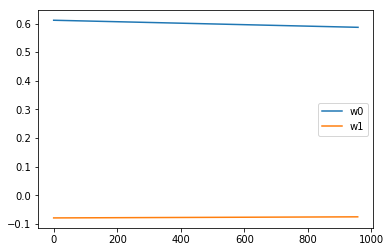

In [46]:
plt.plot(w_zero_graph, label='w0')
plt.plot(w_one_graph, label='w1')
plt.legend()
plt.show()

In [ ]:
converge([w0, w1], 2)
